## MLP Concepts

<img src="https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5fbb135a2a4a0409baa86e9c/f2a66db42c9904407eb8547079ffb4f5/image.png" width=500>

$\mathbf X \in \mathbb{R}^{n\times d}$ : minibatch of n examples where each example has d inputs (features)

$\mathbf H \in \mathbb{R}^{n\times h}$ : hidden layers has h hidden units (hidden-variable)

`Hidden representations`: outputs of the hidden layer

---

$\mathbf W^{(1)} \in \mathbb{R}^{d\times h}$ : hidden layer weigths

$\mathbf b^{(1)} \in \mathbb{R}^{1\times h}$ : hidden layer biases

---

$\mathbf W^{(2)} \in \mathbb{R}^{h\times q}$ : output layer weights

$\mathbf b^{(2)} \in \mathbb{R}^{1\times q}$ : output layer biases

---

Calculate the outpus $\mathbf O \in \mathbb{R}^{n\times q}$
$$\mathbf{H = XW^{(1)}+ b^{(1)}} $$
$$\mathbf{O = HW^{(2)}+ b^{(2)}} $$

근데 그냥 이렇게 하면 어짜피 affine 이라 의미 없음 그래서 activation 추가

$$\mathbf{H} = \sigma(\mathbf{XW^{(1)}+ b^{(1)}}) $$
$$\mathbf{O = HW^{(2)}+ b^{(2)}} $$

## Activations

In [1]:
%matplotlib inline
import torch
import d2l_torch as d2l

### ReLU: Rectified Linear Unit

$$\text{ReLU}(x) = \text{max}(x,0)$$

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)

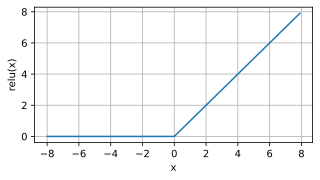

In [3]:
d2l.plot(x.detach(),y.detach(), 'x','relu(x)',figsize=(5,2.5))

* Input is negative: derivative of the ReLU function is 0
* Input is positive: derivative of the ReLU function is 1
* Not differentiable when the input takes value precisely equal to 0

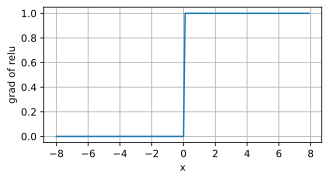

In [4]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

#### pReLU: Parameterized ReLU (He et al., 2015)
This variation adds a linear term to ReLU, so some information still gets
through, even when the argument is negative
$$\text{pReLU}(x) = \text{max}(0,x) + \alpha \text{min}(0,x)$$

### Sigmoid

Sigmoid(x): $\mathbb{R}\to (0,1)$

$$\text{sigmoid(x)} = \frac{1}{1+e^{-x}}$$

* 그라디언트 기반 학습으로 관심이 옮겨갔을 때 시그모이드 함수는 임계값 단위에 대한 부드럽고 미분 가능한 근사값이기 때문에 자연스러운 선택


* Sigmoid는 이진 분류 문제에 대한 확률로 출력을 해석하려는 경우(Sigmoid를 softmax의 특수한 경우로 생각할 수 있음) 출력 단위의 활성화 함수로 여전히 널리 사용


* 그러나 sigmoid는 대부분 은닉층에서 사용하기 위해 더 간단하고 쉽게 훈련할 수 있는 ReLU로 대체


* 순환 신경망에 대한 이후 장에서 시간에 따른 정보 흐름을 제어하기 위해 시그모이드 단위를 활용하는 아키텍처에 대해 설명


* 입력이 0에 가까울 때 시그모이드 함수는 선형 변환에 접근

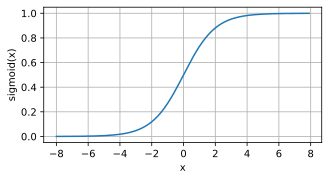

In [5]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x','sigmoid(x)',figsize=(5, 2.5))

Derivative of the sigmoid

$$\frac{d}{dx}\text{sigmoid}(x) = \text{sigmoid}(x)(1-\text{sigmoid}(x))$$

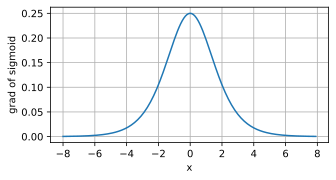

In [6]:
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x','grad of sigmoid',figsize=(5, 2.5))

### Tanh (Hyperbolic Tangent)

tanh(x): $\mathbb{R}\to (-1,1)$

$$\text{tanh}(x) = \frac{1-e^{-2x}}{1+e^{-2x}}$$

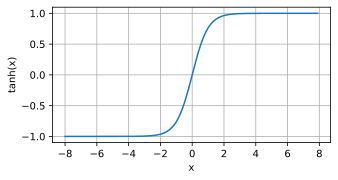

In [7]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

Derivatives

$$\frac{d}{dx}\text{tanh}(x) = 1 - \text{tanh} ^ 2 (x)$$

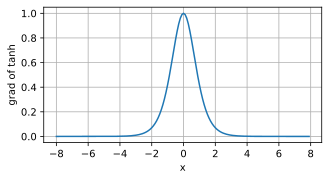

In [8]:
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad,'x','grad of tanh',figsize=(5,2.5))

## MLP from Scratch

In [9]:
import torch
from torch import nn

In [10]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

### Initializing Model Parameter

Fashion-MNIST: 10 classes, each image consists of a 28 x 28 = 784 grid of grayscale pixel values.

MLP 구조
* one hidden layer (256 hidden units)

In [11]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(
    torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))

W2 = nn.Parameter(
    torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1,b1,W2,b2]

### Activation Function

In [12]:
def relu(X): # elementwise
    a = torch.zeros_like(X)
    return torch.max(X,a)

### Model

In [13]:
def net(X):
    X = X.reshape((-1,num_inputs)) # 1 x 784
    H = relu(X @ W1 + b1)
    return (H @ W2 + b2)

### Loss

section 3.6에서 직접 만들었기 때문에 여기서는 기존 모듈 사용

In [14]:
loss = nn.CrossEntropyLoss()

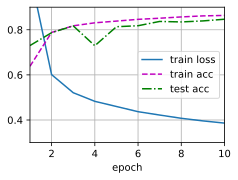

In [15]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

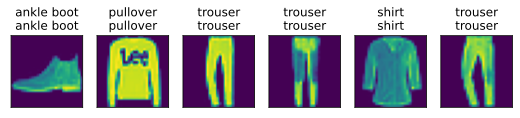

In [16]:
d2l.predict_ch3(net, test_iter)

## Concise Implementation of MLP

In [17]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784,256), nn.ReLU(),
                   nn.Linear(256,10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

apply?

In [18]:
def print_layer(m):
    print(111)
    print(m)

In [19]:
net.apply(print_layer)

111
Flatten(start_dim=1, end_dim=-1)
111
Linear(in_features=784, out_features=256, bias=True)
111
ReLU()
111
Linear(in_features=256, out_features=10, bias=True)
111
Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)


Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

pandas 에서 apply랑 비슷한듯 마지막엔 전체 Sequential을 전달

In [20]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=lr)

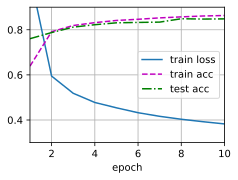

In [21]:
# train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## Polynomial Regression

In [22]:
import math
import numpy as np

In [23]:
max_degree = 20 # Maximum degree of the polynomial
n_train, n_test = 100, 100 # Training and test dataset sizes
true_w = np.zeros(max_degree) # Allocate lots of empty space
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))

for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1) # `gamma(n)` = (n-1)!

# Shape of `labels`: (`n_train` + `n_test`,)
labels = np.dot(poly_features, true_w) 
labels += np.random.normal(scale=0.1, size=labels.shape) # error term

In [26]:
# Convert from NumPy ndarrays to tensors
true_w, features, poly_features, labels = [
    torch.tensor(x, dtype=torch.float32)
    for x in [true_w, features, poly_features, labels]]

In [27]:
features[:2], poly_features[:2, :], labels[:2]

(tensor([[-0.8770],
         [-1.6562]]),
 tensor([[ 1.0000e+00, -8.7696e-01,  3.8453e-01, -1.1241e-01,  2.4644e-02,
          -4.3224e-03,  6.3176e-04, -7.9147e-05,  8.6761e-06, -8.4540e-07,
           7.4138e-08, -5.9106e-09,  4.3195e-10, -2.9139e-11,  1.8252e-12,
          -1.0671e-13,  5.8488e-15, -3.0172e-16,  1.4700e-17, -6.7848e-19],
         [ 1.0000e+00, -1.6562e+00,  1.3714e+00, -7.5710e-01,  3.1347e-01,
          -1.0383e-01,  2.8660e-02, -6.7808e-03,  1.4038e-03, -2.5832e-04,
           4.2782e-05, -6.4412e-06,  8.8897e-07, -1.1325e-07,  1.3397e-08,
          -1.4792e-09,  1.5311e-10, -1.4916e-11,  1.3724e-12, -1.1963e-13]]),
 tensor([ 2.1096, -5.7180]))

In [32]:
def evaluate_loss(net, data_iter, loss): #@save
    """Evaluate the loss of a model on the given dataset."""
    metric = d2l.Accumulator(2) # Sum of losses, no. of examples
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [33]:
def train(train_features, test_features, train_labels, test_labels,
            num_epochs=400):
    
    loss = nn.MSELoss()
    input_shape = train_features.shape[-1]
    
    # Switch off the bias since we already catered for it in the polynomial
    # features
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False)) # 모델
    batch_size = min(10, train_labels.shape[0])
    
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1, 1)),
                                batch_size)
    
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1, 1)),
                                batch_size, is_train=False)
    
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(
                        net, train_iter, loss), evaluate_loss(net, test_iter, loss)))
            
    print('weight:', net[0].weight.data.numpy())

### Third-Order Polynomial Function Fitting

weight: [[ 4.9919114  1.1918654 -3.3873072  5.583935 ]]


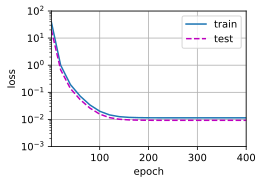

In [34]:
# Pick the first four dimensions, i.e., 1, x, x^2/2!, x^3/3! from the
# polynomial features
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
    labels[:n_train], labels[n_train:])

### Linear Function Fitting (Underfitting)

weight: [[3.018481 5.421308]]


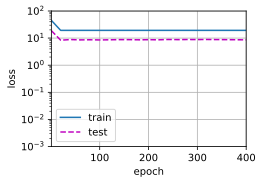

In [35]:
# Pick the first two dimensions, i.e., 1, x, from the polynomial features
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
labels[:n_train], labels[n_train:])

### Higher-Order Polynomial Function Fitting (Overfitting)

weight: [[ 5.0021358   1.26727    -3.456914    5.204257    0.11273304  1.0331649
   0.45382756 -0.08737589 -0.15195169  0.13671154  0.07127283  0.1881114
   0.11636197  0.07304987  0.14640163 -0.10853638  0.04066433  0.06535554
  -0.06432411  0.08822995]]


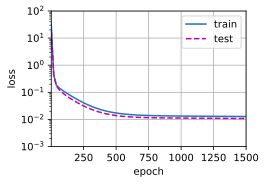

In [38]:
# Pick all the dimensions from the polynomial features
train(poly_features[:n_train, :], poly_features[n_train:, :],
labels[:n_train], labels[n_train:], num_epochs=1500)

## Weight Decay

Weight decay (commonly called L2 regularization), might be the most
widely-used technique for regularizing parametric machine learning models.

* f=0 이라는 simple function과의 Banach spaces에서 정의된 distance를 metric으로 사용
* 가장 단순한 방식은 weight의 norm을 추가하는 것 (Regularization)

### High-Dimensional Linear Regression 

![](https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5fbb135a2a4a0409baa86e9c/3723eb903bf0084aeb767633ca30351b/image.png)

In [39]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05

train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)

test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

#### Implementation from scratch

In [41]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

In [45]:
# Defining L2 Norm Penalty
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

In [46]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # The L2 norm penalty term has been added, and broadcasting
            # makes `l2_penalty(w)` a vector whose length is `batch_size`
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                    d2l.evaluate_loss(net, test_iter, loss)))
    print('L2 norm of w:', torch.norm(w).item())

L2 norm of w: 13.910710334777832


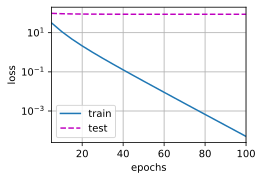

In [47]:
train(lambd=0) # No Regularization

L2 norm of w: 0.3770790994167328


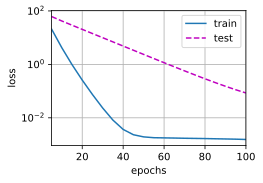

In [48]:
train(lambd=3)

#### Concise Implementation

In [49]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    
    for param in net.parameters():
        param.data.normal_()
    
    loss = nn.MSELoss()
    
    num_epochs, lr = 100, 0.003
    
    # The bias parameter has not decayed
    trainer = torch.optim.SGD([{
        "params": net[0].weight,
        'weight_decay': wd}, {
        "params": net[0].bias}], lr=lr)
    
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
        d2l.evaluate_loss(net, test_iter, loss)))
    print('L2 norm of w:', net[0].weight.norm().item())

L2 norm of w: 14.095399856567383


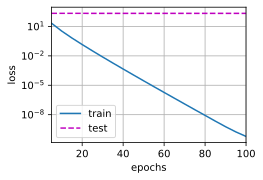

In [50]:
train_concise(0)

L2 norm of w: 0.2932238280773163


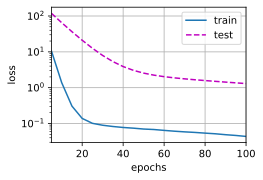

In [57]:
train_concise(5)

## Dropout

### From Scratch

![](https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5fbb135a2a4a0409baa86e9c/5147ecad2bd905d405aed52a1a334f78/image.png)

In [58]:
def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    
    # In th is case, all elements are dropped out
    if dropout == 1:
        return torch.zeros_like(X)
    # In this case, all elements are kept
    if dropout == 0:
        return X
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1-dropout)

In [59]:
X = torch.arange(16, dtype=torch.float32).reshape((2, 8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1.))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  2.,  0.,  0.,  8.,  0.,  0.,  0.],
        [16.,  0., 20., 22., 24., 26., 28., 30.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


In [60]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

In [63]:
dropout1, dropout2 = 0.2, 0.5

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,
                is_training=True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()
        
    def forward(self, X):
        
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        # Use dropout only when training the model
        if self.training == True:
            # Add a dropout layer after the first fully connected layer
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            # Add a dropout layer after the second fully connected layer
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out

net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

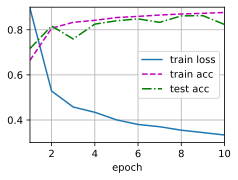

In [64]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### Concise Implementation

In [65]:
net = nn.Sequential(
        nn.Flatten(), nn.Linear(784,256), nn.ReLU(),
        nn.Dropout(dropout1), nn.Linear(256,256),nn.ReLU(),
        nn.Dropout(dropout2), nn.Linear(256,10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

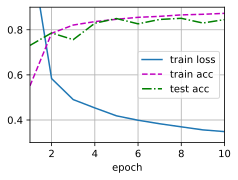

In [66]:
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## Forward Propagation, Backward Propagation, and Computational Graphs

<img src="https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5fbb135a2a4a0409baa86e9c/9d967451167c95a7ceb3fec6f8802f38/image.png" width=600>

* Forward Propagation을 나타낸 Computational Graph
* 위 그래프를 거꾸로(J에서 시작) 타고 가면서 back propagation 진행 됨

Therefore when training neural networks, after model parameters are initialized, we alternate
forward propagation with backpropagation, updating model parameters using gradients given by
backpropagation. Note that backpropagation reuses the stored intermediate values from forward
propagation to avoid duplicate calculations. One of the consequences is that we need to retain
the intermediate values until backpropagation is complete. This is also one of the reasons why
training requires significantly more memory than plain prediction. Besides, the size of such intermediate
values is roughly proportional to the number of network layers and the batch size.
Thus, training deeper networks using larger batch sizes more easily leads to out of memory errors.

## Numerical Stability and Initialization

### Vanishing Gradients

activation에 의해 주로 발생함

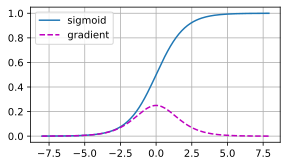

In [68]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

### Exploding Gradients

vanishing과 비슷하게 계속 곱해져서 발생

### Breaking the Symmetry

Initialize된 weight 대칭성을 가지게 된다면 (dropout같은걸 쓰기 전에는)backprop으로 학습 시켜도 대칭이 계속 유지되어 학습이 제대로 안됨

## Parameter Initialization

딥러닝 개론때 배운것들

## Environment and Distribution Shift

Data Distribution에 갑자기 shift가 일어난다면?

### Types of Distribution Shift

**Covariate Shift**

Among categories of distribution shift, covariate shift may be the most widely studied. Here, we
assume that while the distribution of inputs may change over time, the labeling function, i.e., the
conditional distribution $P(y\,|\, \textbf x)$ does not change.

Statisticians call this covariate shift because
the problem arises due to a shift in the distribution of the covariates (features).

While we can sometimes reason about distribution shift without invoking causality, we note that covariate shift is the natural assumption to invoke in settings where we believe that $\textbf x$ causes $y$.

![](https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5fbb135a2a4a0409baa86e9c/cf5e528f3051bc5f937cb565a53aaac2/image.png)

The training set consists of photos, while the test set contains only cartoons. Training on a dataset with substantially different characteristics from the test set can spell trouble absent a coherent
plan for how to adapt to the new domain.

**Label Shift**

$P(\textbf x | y)$ 가 고정 되고 $P(y)$ 가 바뀐다

Label shift is
a reasonable assumption to make when we believe that $y$ causes $\textbf x$.

* eg. P(고열|코로나)는 일정, P(코로나) ~ 확진자 수는 변함 -> 코로나가 고열의 원인이 된다고 가정하기 때문

**Concept Shift**

(단어 같은)어떤 개념의 컨셉이 바뀌는 것

## Correction of Distribution Shift

### Empirical Risk

$$\underset{f}{\text{minimize}}\frac{1}{n}\sum_{i=1}^{n}l(f(\textbf{x}_i),y_i)$$

The empirical risk is an average loss over the
training data to approximate the risk, which is the expectation of the loss over the entire population
of data drawn from their true distribution $p(\textbf x, y)$:

$$E_{p(\textbf x,y)}[l(f(\textbf{x}),y)] = \int \int l(f(\textbf{x}),y)p(\textbf x,y) d\textbf xdy$$

나중에 추가로 보기